<a href="https://colab.research.google.com/github/sakibchowdhury131/BanglaSummarization_colab/blob/main/BengaliSummarization_EACL_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

In [ ]:
!git clone https://github.com/tafseer-nayeem/BengaliSummarization.git

Cloning into 'BengaliSummarization'...
remote: Enumerating objects: 2270, done.
remote: Counting objects: 100% (2270/2270), done.
remote: Compressing objects: 100% (2043/2043), done.
remote: Total 2270 (delta 392), reused 2085 (delta 211), pack-reused 0
Receiving objects: 100% (2270/2270), 2.59 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (392/392), done.


In [ ]:
!pip install bnlm

     |████████████████████████████████| 233 kB 4.2 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
     |████████████████████████████████| 1.1 MB 26.9 MB/s 
     |████████████████████████████████| 1.2 MB 28.2 MB/s 
     |████████████████████████████████| 271 kB 36.9 MB/s 
     |████████████████████████████████| 144 kB 45.4 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=2b70ec3b1d50805ffb8fbeaa7ec35051a3ba2d1b8e09ccbb7d34f24d1cd8be60
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!cp /content/drive/MyDrive/Celloscope/BengaliSummarization/BenSumm/export.pkl /content/BengaliSummarization/Code/AbstractiveSummarizer/model

In [ ]:
pip install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.9 kB/s 
     |████████████████████████████████| 8.8 MB 20.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.2.0+cu92 which is incompatible.


In [ ]:
pip install networkx==1.7

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
  Created wheel for networkx: filename=networkx-1.7-py3-none-any.whl size=879758 sha256=7215786b81e707cc37ac7eed619759597cee7347b75e413f1ff8e674782d5231
  Stored in directory: /root/.cache/pip/wheels/8b/4d/d3/52e3d318afd43b212a7347d6e51df81f6a04a1d08a2f69c31a
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.3 requires networkx>=2.0, but you have networkx 1.7 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%cd /content/BengaliSummarization/Code/AbstractiveSummarizer

/content/BengaliSummarization/Code/AbstractiveSummarizer


# Functions 

In [ ]:
import wordgraph
import hClustering as clustering
import sentTokenizer
import os
from bnlm.bnlm import BengaliTokenizer
from bnlm.bnlm import get_sentence_encoding
from bnlm.bnlm import get_sentence_similarity

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        
def listToString(s):  
    str1 = " "      
    return (str1.join(s)) 

def getSummary(filename, n):
    summary = []
    for k in range(n):
        summary_lines = wordgraph.takeinput(filename[k])
        print("summary_lines:",summary_lines)
        if(summary_lines):
            summary.append(summary_lines)
     
    full_summary =[]
    for x in summary:
        x = x[:-1]
        left_text = x.partition("।")[0]
        left_text = left_text.partition("?")[0]
        left_text = left_text.partition("!")[0]
        full_summary.append(left_text+"।")  
    s = listToString(full_summary)
    return s



In [ ]:
%cd /content/BengaliSummarization/Code/AbstractiveSummarizer

/content/BengaliSummarization/Code/AbstractiveSummarizer


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
'''
for i in range(1,13):
    
    serial_no = str(i)
    document = open('../../Dataset/NCTB/Source/'+serial_no+'.txt').read()
    doc = sentTokenizer.sentTokenizing().sentTokenize(document)
    print('doc',doc)
    
    filenamee, n = clustering.startF(doc)
    print("\n\nSource:",document)
    
    summary = getSummary(filenamee)
    print('\n\nSystem Made Summary:',summary)
    
    
    #human = open('DataSet/NCTB/Summary/'+serial_no+'.txt').read()
    #print('\n\nHuman Made Summary:',human)
    
    #save the summary
    createFolder('Dataset/NCTB/MachineGeneratedSummary/')
    fi = open('Dataset/NCTB/MachineGeneratedSummary/'+serial_no+'.txt','+w')
    fi.write(summary)


'''

'\nfor i in range(1,13):\n    \n    serial_no = str(i)\n    document = open(\'../../Dataset/NCTB/Source/\'+serial_no+\'.txt\').read()\n    doc = sentTokenizer.sentTokenizing().sentTokenize(document)\n    print(\'doc\',doc)\n    \n    filenamee, n = clustering.startF(doc)\n    print("\n\nSource:",document)\n    \n    summary = getSummary(filenamee)\n    print(\'\n\nSystem Made Summary:\',summary)\n    \n    \n    #human = open(\'DataSet/NCTB/Summary/\'+serial_no+\'.txt\').read()\n    #print(\'\n\nHuman Made Summary:\',human)\n    \n    #save the summary\n    createFolder(\'Dataset/NCTB/MachineGeneratedSummary/\')\n    fi = open(\'Dataset/NCTB/MachineGeneratedSummary/\'+serial_no+\'.txt\',\'+w\')\n    fi.write(summary)\n\n\n'

In [ ]:
'''

file_name = 'output'
#document = open('../../Dataset/NCTB/Source/'+serial_no+'.txt').read()
document = 'জ্ঞাত আয়বহির্ভূত সম্পদ অর্জনের মামলায় ঢাকা মহানগর দক্ষিণ যুবলীগের বহিষ্কৃত নেতা ইসমাইল হোসেন চৌধুরী সম্রাটের জামিন বাতিল করেছেন হাইকোর্ট। আজ বুধবার বিচারপতি মো. নজরুল ইসলাম তালুকদারের নেতৃত্বাধীন দ্বৈত বেঞ্চ সম্রাটের জামিন বাতিল করেন। একই সঙ্গে সম্রাটকে সাত দিনের মধ্যে বিচারিক আদালতে আত্মসমর্পণের নির্দেশ দিয়েছেন হাইকোর্ট। মামলায় সম্রাটের জামিন বাতিল চেয়ে গত সোমবার হাইকোর্টে আবেদন করেছিল দুর্নীতি দমন কমিশন (দুদক)। জ্ঞাত আয়বহির্ভূত সম্পদ অর্জনের অভিযোগে দুদকের এই মামলায় ১১ মে জামিন পেয়েছিলেন সম্রাট। ঢাকার বিশেষ জজ আদালত-৬-এর বিচারক আল আসাদ মো. আসিফুজ্জামান এই জামিন দিয়েছিলেন।'
doc = sentTokenizer.sentTokenizing().sentTokenize(document)
#print('doc',doc)

filenamee, n = clustering.startF(doc)
#print("\n\nSource:",document)

summary = getSummary(filenamee)
print('\n\nSystem Made Summary:',summary)


#human = open('DataSet/NCTB/Summary/'+serial_no+'.txt').read()
#print('\n\nHuman Made Summary:',human)

#save the summary
createFolder('Dataset/NCTB/MachineGeneratedSummary/')
fi = open('Dataset/NCTB/MachineGeneratedSummary/'+file_name+'.txt','+w')
fi.write(summary)

'''

'\n\nfile_name = \'output\'\n#document = open(\'../../Dataset/NCTB/Source/\'+serial_no+\'.txt\').read()\ndocument = \'জ্ঞাত আয়বহির্ভূত সম্পদ অর্জনের মামলায় ঢাকা মহানগর দক্ষিণ যুবলীগের বহিষ্কৃত নেতা ইসমাইল হোসেন চৌধুরী সম্রাটের জামিন বাতিল করেছেন হাইকোর্ট। আজ বুধবার বিচারপতি মো. নজরুল ইসলাম তালুকদারের নেতৃত্বাধীন দ্বৈত বেঞ্চ সম্রাটের জামিন বাতিল করেন। একই সঙ্গে সম্রাটকে সাত দিনের মধ্যে বিচারিক আদালতে আত্মসমর্পণের নির্দেশ দিয়েছেন হাইকোর্ট। মামলায় সম্রাটের জামিন বাতিল চেয়ে গত সোমবার হাইকোর্টে আবেদন করেছিল দুর্নীতি দমন কমিশন (দুদক)। জ্ঞাত আয়বহির্ভূত সম্পদ অর্জনের অভিযোগে দুদকের এই মামলায় ১১ মে জামিন পেয়েছিলেন সম্রাট। ঢাকার বিশেষ জজ আদালত-৬-এর বিচারক আল আসাদ মো. আসিফুজ্জামান এই জামিন দিয়েছিলেন।\'\ndoc = sentTokenizer.sentTokenizing().sentTokenize(document)\n#print(\'doc\',doc)\n\nfilenamee, n = clustering.startF(doc)\n#print("\n\nSource:",document)\n\nsummary = getSummary(filenamee)\nprint(\'\n\nSystem Made Summary:\',summary)\n\n\n#human = open(\'DataSet/NCTB/Summary/\'+serial_no+\'.txt\')

# sumamry: output is saved in /content/BengaliSummarization/Code/AbstractiveSummarizer/Dataset/NCTB/MachineGeneratedSummary

In [ ]:
def summarize(text):
  out_file = 'output'
  doc = sentTokenizer.sentTokenizing().sentTokenize(text)
  #print('doc',doc)
  filenamee, n = clustering.startF(doc)
  #print("\n\nSource:",document)
  summary = getSummary(filenamee, n)
  createFolder('Dataset/NCTB/MachineGeneratedSummary/')
  fi = open('Dataset/NCTB/MachineGeneratedSummary/'+out_file+'.txt','+w')
  fi.write(summary)
  return summary

doccument: ['২০১৯ সালের ৬ অক্টোবর সম্রাট ও তাঁর সহযোগী তৎকালীন যুবলীগ নেতা এনামুল হক ওরফে আরমানকে কুমিল্লা থেকে গ্রেপ্তার করে র\u200d্যাব।', 'তখন র\u200d্যাব জানায়, গ্রেপ্তারের সময় সম্রাট ও আরমান মদ্যপ ছিলেন।', 'তাঁদের কাছে বিদেশি মদ ছিল।', 'এ কারণে ভ্রাম্যমাণ আদালত তাঁদের ছয় মাস করে কারাদণ্ড দেন।', 'গ্রেপ্তারের পর সম্রাট ও আরমানকে কুমিল্লা থেকে ঢাকায় আনা হয়।', 'ঢাকায় আনার পর সম্রাটকে সঙ্গে নিয়ে তাঁর কাকরাইলের কার্যালয়ে অভিযান চালায় র\u200d্যাব।', 'সম্রাটের কার্যালয়ে বন্য প্রাণীর চামড়া, মাদকদ্রব্য ও অস্ত্র পাওয়ার কথা জানানো হয়।', 'বন্য প্রাণীর চামড়া রাখায় ভ্রাম্যমাণ আদালত সম্রাটকে ছয় মাসের কারাদণ্ড দেন।']


[0.39314629921548716, 0.39142566577281745, 0.26735042132749864, 0.26675311515467964, 0.1755112812406741, 0.052400034639832546]
0


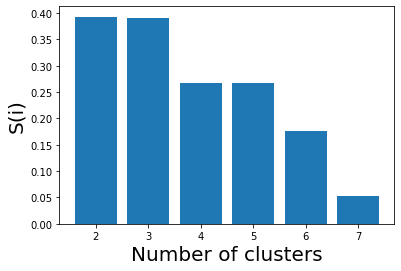

cluster  0 :
	sentence  0 :  তাঁদের কাছে বিদেশি মদ ছিল।
	sentence  1 :  এ কারণে ভ্রাম্যমাণ আদালত তাঁদের ছয় মাস করে কারাদণ্ড দেন।
	sentence  2 :  বন্য প্রাণীর চামড়া রাখায় ভ্রাম্যমাণ আদালত সম্রাটকে ছয় মাসের কারাদণ্ড দেন।
cluster  1 :
	sentence  0 :  ২০১৯ সালের ৬ অক্টোবর সম্রাট ও তাঁর সহযোগী তৎকালীন যুবলীগ নেতা এনামুল হক ওরফে আরমানকে কুমিল্লা থেকে গ্রেপ্তার করে র‍্যাব।
	sentence  1 :  তখন র‍্যাব জানায়, গ্রেপ্তারের সময় সম্রাট ও আরমান মদ্যপ ছিলেন।
	sentence  2 :  গ্রেপ্তারের পর সম্রাট ও আরমানকে কুমিল্লা থেকে ঢাকায় আনা হয়।
	sentence  3 :  ঢাকায় আনার পর সম্রাটকে সঙ্গে নিয়ে তাঁর কাকরাইলের কার্যালয়ে অভিযান চালায় র‍্যাব।
	sentence  4 :  সম্রাটের কার্যালয়ে বন্য প্রাণীর চামড়া, মাদকদ্রব্য ও অস্ত্র পাওয়ার কথা জানানো হয়।
Cluster Sentences are: ['তাঁদের কাছে বিদেশি মদ ছিল। এ কারণে ভ্রাম্যমাণ আদালত তাঁদের ছয় মাস করে কারাদণ্ড দেন। বন্য প্রাণীর চামড়া রাখায় ভ্রাম্যমাণ আদালত সম্রাটকে ছয় মাসের কারাদণ্ড দেন। ', '২০১৯ সালের ৬ অক্টোবর সম্রাট ও তাঁর সহযোগী তৎকালীন যুবলীগ নেতা এনামুল হক ওরফে আরমানকে কুমিল্লা থেক

In [ ]:
print(summarize('২০১৯ সালের ৬ অক্টোবর সম্রাট ও তাঁর সহযোগী তৎকালীন যুবলীগ নেতা এনামুল হক ওরফে আরমানকে কুমিল্লা থেকে গ্রেপ্তার করে র‍্যাব। তখন র‍্যাব জানায়, গ্রেপ্তারের সময় সম্রাট ও আরমান মদ্যপ ছিলেন। তাঁদের কাছে বিদেশি মদ ছিল। এ কারণে ভ্রাম্যমাণ আদালত তাঁদের ছয় মাস করে কারাদণ্ড দেন। গ্রেপ্তারের পর সম্রাট ও আরমানকে কুমিল্লা থেকে ঢাকায় আনা হয়। ঢাকায় আনার পর সম্রাটকে সঙ্গে নিয়ে তাঁর কাকরাইলের কার্যালয়ে অভিযান চালায় র‍্যাব। সম্রাটের কার্যালয়ে বন্য প্রাণীর চামড়া, মাদকদ্রব্য ও অস্ত্র পাওয়ার কথা জানানো হয়। বন্য প্রাণীর চামড়া রাখায় ভ্রাম্যমাণ আদালত সম্রাটকে ছয় মাসের কারাদণ্ড দেন।'))